In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
!unzip --qq wadnan.zip

In [ ]:
width = 128
num_classes = 6
trainpath = 'train/'
testpath = 'test/'
trainImg = [trainpath+f for f in listdir(trainpath) if listdir(join(trainpath, f))]
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]

In [ ]:
testImg 


['test/Unknown',
 'test/Phra That Chang Kham',
 'test/Phra That Chae Haeng',
 'test/Sri Pan Ton',
 'test/phumin',
 'test/MingMuang']

In [ ]:
trainImg

['train/Unknown',
 'train/Phra That Chang Kham',
 'train/Phra That Chae Haeng',
 'train/Sri Pan Ton',
 'train/phumin',
 'train/MingMuang']

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []
  c = 0
  for imagePath in (path):
      for item in tqdm(os.listdir(imagePath)):
          file = os.path.join(imagePath, item)
          c+=1
          l = imagePath.split('/')[1]
          if l == 'Unknown':
            labels.append([1,0,0,0,0,0])   
          elif l == 'MingMuang':
            labels.append([0,1,0,0,0,0])         
          elif l == 'Sri Pan Ton':
            labels.append([0,0,1,0,0,0])   
          elif l == 'Phra That Chae Haeng':
            labels.append([0,0,0,1,0,0])   
          elif l == 'Phra That Chang Kham':
            labels.append([0,0,0,0,1,0])   
          elif l == 'phumin':
            labels.append([0,0,0,0,0,1])   
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rawImgs.append(img)
  return rawImgs, labels
 

In [ ]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 38/38 [00:00<00:00, 807.49it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((3349, 128, 128, 3), (3349, 6), (208, 128, 128, 3), (208, 6))

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(128,(3,3), activation='relu', input_shape=(width, width, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(64,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(32,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dropout(0.25),
        keras.layers.Conv2D(16,(3,3) , activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2 )),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),

        keras.layers.Dense(num_classes, activation='softmax') 
    ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)       

In [ ]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy',metrics= ['accuracy'])

batch_size = 32
epochs = 20

In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/20
105/105 [==============================] - 12s 95ms/step - loss: 1.7756 - accuracy: 0.2150 - val_loss: 1.7710 - val_accuracy: 0.2212
Epoch 2/20
105/105 [==============================] - 9s 87ms/step - loss: 1.5662 - accuracy: 0.3903 - val_loss: 1.6266 - val_accuracy: 0.2692
Epoch 3/20
105/105 [==============================] - 9s 88ms/step - loss: 1.2756 - accuracy: 0.5321 - val_loss: 1.5311 - val_accuracy: 0.3654
Epoch 4/20
105/105 [==============================] - 9s 86ms/step - loss: 1.1434 - accuracy: 0.5754 - val_loss: 1.3609 - val_accuracy: 0.5000
Epoch 5/20
105/105 [==============================] - 9s 87ms/step - loss: 1.0690 - accuracy: 0.6082 - val_loss: 1.3921 - val_accuracy: 0.4712
Epoch 6/20
105/105 [==============================] - 9s 87ms/step - loss: 1.0107 - accuracy: 0.6333 - val_loss: 1.3244 - val_accuracy: 0.4760
Epoch 7/20
105/105 [==============================] - 9s 86ms/step - loss: 0.9639 - accuracy: 0.6494 - val_loss: 1.2646 - val_accuracy: 0.480

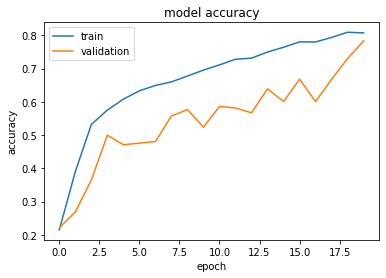

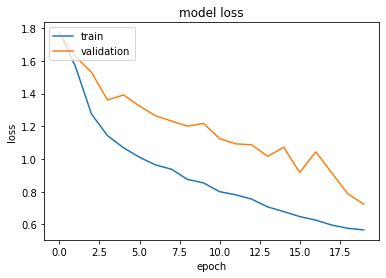

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

[[0.19556677 0.47659713 0.0021502  0.01416764 0.07546045 0.23605782]]
real:241295341_1591411197880550_5793284729999059305_n.jpg
predict:MingMuang


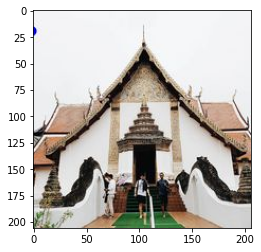

[[0.28586262 0.37128836 0.00331871 0.01006319 0.06341551 0.26605153]]
real:131275805_10159054195514756_410765730366151554_n.jpg
predict:MingMuang


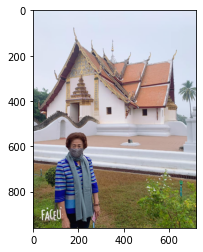

[[0.64999765 0.14674364 0.00576192 0.00228283 0.0230505  0.17216346]]
real:245670777_4139091349536221_5305255290234778638_n.jpg
predict:Unknown


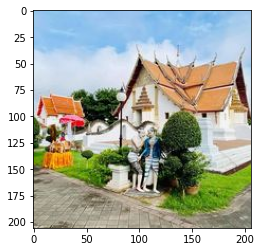

[[0.2382031  0.11252947 0.00108674 0.01645707 0.35322726 0.27849638]]
real:245311132_10159388781128971_6955852584831227754_n.jpg
predict:Phra That Chang Kham


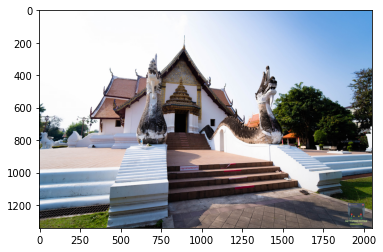

[[0.7568783  0.04198293 0.00143398 0.0052482  0.01377228 0.1806843 ]]
real:241349453_3012481495636638_2788852341363347325_n.jpg
predict:Unknown


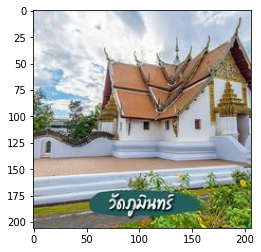

[[0.22227229 0.00220113 0.08753006 0.00599322 0.05812007 0.62388325]]
real:249378367_2108472042637728_4546925628309201624_n.jpg
predict:phumin


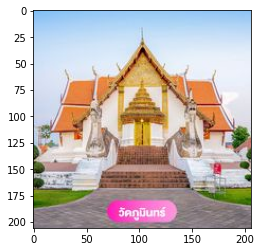

[[0.09239104 0.38707656 0.001205   0.04094642 0.14294556 0.33543545]]
real:241525402_1695993157254272_5720653324587604382_n.jpg
predict:MingMuang


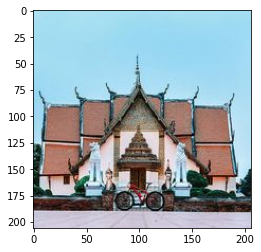

[[0.41383356 0.0012008  0.06140948 0.07641885 0.1362979  0.31083947]]
real:0 (13).jpg
predict:Unknown


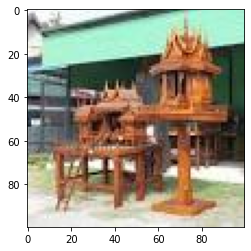

[[0.4759373  0.09678299 0.00438289 0.0018279  0.17184594 0.24922289]]
real:3.jpg
predict:Unknown


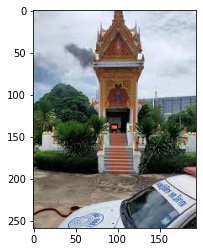

[[1.7918649e-01 5.2339089e-01 3.1465743e-04 4.8343759e-02 2.2727327e-02
  2.2603692e-01]]
real:247433627_1240422163103798_2257607640007689800_n.jpg
predict:MingMuang


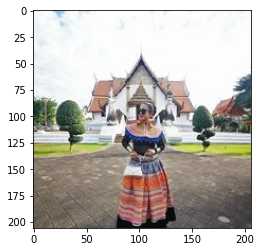

In [ ]:
testpath = 't1/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['Unknown','MingMuang','Sri Pan Ton','Phra That Chae Haeng','Phra That Chang Kham','phumin']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          cv2.putText(img, 'real:'+str(item), (10,10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,))
          cv2.putText(img, 'predict'+str(result), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,0))
          plt.imshow(ori)
          plt.show()




---



---



Transfer learning with MobilenetV2

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width,width,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False
num_classes = 6


model = keras.Sequential([
        base_model,
        
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(16),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation='softmax')
    ])


9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy'
                , metrics= ['accuracy'], weighted_metrics=['accuracy'])

batch_size = 32
epochs = 20

In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/20
105/105 [==============================] - 10s 60ms/step - loss: 0.5414 - accuracy: 0.8779 - weighted_accuracy: 0.8779 - val_loss: 0.4822 - val_accuracy: 0.8798 - val_weighted_accuracy: 0.8798
Epoch 2/20
105/105 [==============================] - 5s 45ms/step - loss: 0.0429 - accuracy: 0.9872 - weighted_accuracy: 0.9872 - val_loss: 0.5998 - val_accuracy: 0.8365 - val_weighted_accuracy: 0.8365
Epoch 3/20
105/105 [==============================] - 5s 44ms/step - loss: 0.0196 - accuracy: 0.9934 - weighted_accuracy: 0.9934 - val_loss: 0.3990 - val_accuracy: 0.9279 - val_weighted_accuracy: 0.9279
Epoch 4/20
105/105 [==============================] - 5s 44ms/step - loss: 0.0067 - accuracy: 0.9982 - weighted_accuracy: 0.9982 - val_loss: 0.3814 - val_accuracy: 0.9279 - val_weighted_accuracy: 0.9279
Epoch 5/20
105/105 [==============================] - 5s 44ms/step - loss: 0.0045 - accuracy: 0.9988 - weighted_accuracy: 0.9988 - val_loss: 0.4316 - val_accuracy: 0.9375 - val_weighted_a

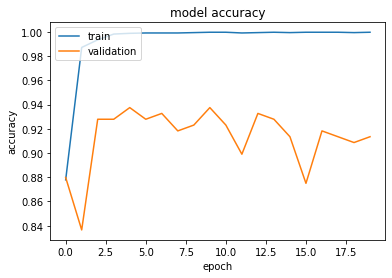

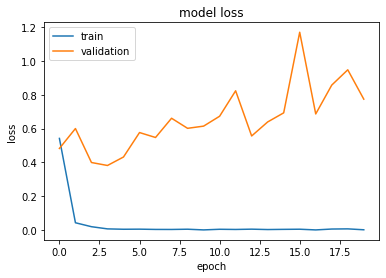

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---


This for try out your image

[[1.0000000e+00 9.6004900e-15 4.3848648e-19 6.1159541e-13 1.3712031e-16
  1.9884864e-12]]
real:Unknown (45).jpg
predict:Unknown


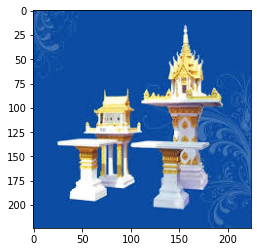

[[1.8094362e-12 9.3319585e-10 1.0000000e+00 1.5024591e-14 8.2728757e-18
  4.3189231e-13]]
real:images (7).jpg
predict:Sri Pan Ton


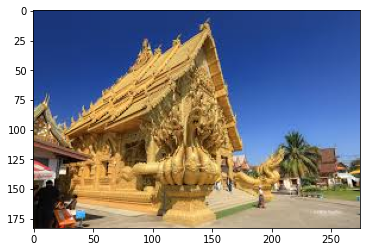

[[1.0000000e+00 2.0174834e-15 3.5019548e-10 4.0403951e-09 3.1385512e-14
  2.4756351e-17]]
real:images (1).jpg
predict:Unknown


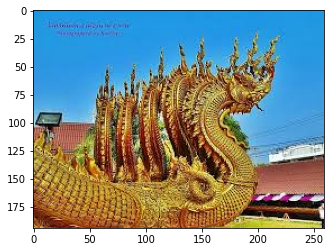

[[9.9998784e-01 5.4114130e-11 3.7060190e-12 1.2158375e-05 8.5063440e-13
  4.0485806e-11]]
real:images (2).jpg
predict:Unknown


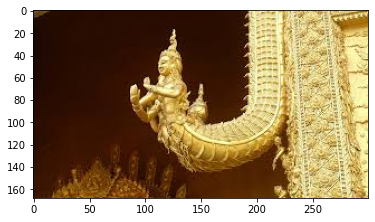

[[9.1013169e-01 1.1321899e-04 8.7654933e-02 1.9245963e-03 8.5432097e-09
  1.7552399e-04]]
real:images (6).jpg
predict:Unknown


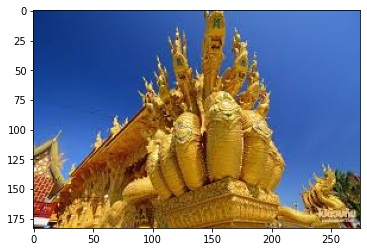

[[1.0000000e+00 3.0208797e-24 1.4032578e-19 2.1752789e-15 1.5466234e-21
  2.6910071e-12]]
real:Unknown (3).jpg
predict:Unknown


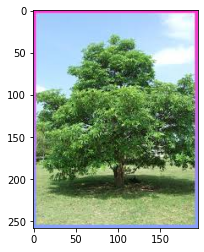

[[1.2218245e-08 9.9999762e-01 8.6091052e-07 1.0441632e-12 3.3515144e-09
  1.5471921e-06]]
real:images (4).jpg
predict:MingMuang


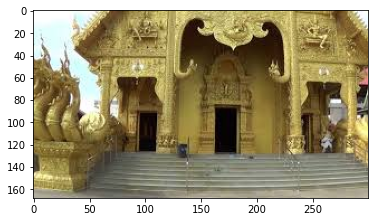

[[3.2574331e-07 1.0072784e-01 8.9927161e-01 1.5765234e-07 1.0924152e-07
  3.8786684e-08]]
real:images.jpg
predict:Sri Pan Ton


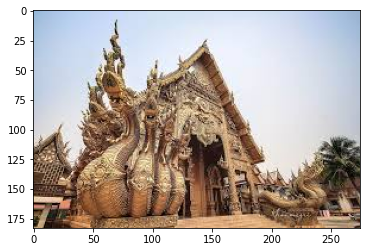

[[2.1498168e-19 6.4494586e-12 1.0000000e+00 1.2267489e-17 1.1248776e-18
  7.2796275e-17]]
real:images (5).jpg
predict:Sri Pan Ton


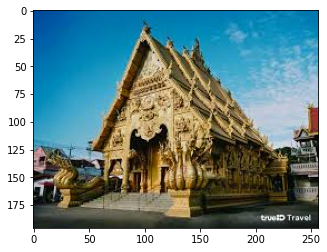

[[9.9977738e-01 3.4600218e-14 1.9450917e-10 2.2268649e-04 1.0050521e-12
  2.3797262e-12]]
real:images (3).jpg
predict:Unknown


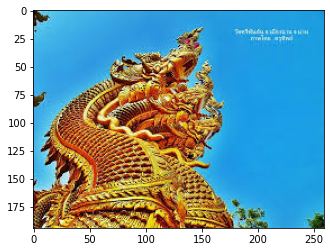

In [ ]:
testpath = 't5/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":
           
          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          

          predict = model.predict(rimg)
          label = ['Unknown','MingMuang','Sri Pan Ton','Phra That Chae Haeng','Phra That Chang Kham','phumin']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          #cv2.putText(img, 'real:'+str(item), (10,10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,))
          #cv2.putText(img, 'predict'+str(result), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255,0,0))
          plt.imshow(ori)
          plt.show()



In [ ]:
model.save("model01.hdf5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
